In [10]:
import numpy as np
import matplotlib.pyplot as plt
from blimpy import GuppiRaw
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [2]:
cuda_filename = "blc3_guppi_57386_VOYAGER1_0004.0000_block000_power.dat"
raw_filename = "../blc3_guppi_57386_VOYAGER1_0004.0000.raw"
nchan = 64

In [3]:
gr = GuppiRaw(raw_filename)
header, raw_complex = gr.read_next_data_block()
raw_complex.shape

(64, 516608, 2)

In [9]:
nchans = len(raw_complex[:,0,0])
nsamp =  len(raw_complex[0,:,0])
raw_spec = np.zeros(shape=(nchans,nsamp))
print(raw_spec.shape)

for chan in range(nchan):
    print("Channel: ", chan)
    for samp in range(nsamp):
        pow = raw_complex[chan,samp,0].real ** 2 \
                + raw_complex[chan,samp,0].imag ** 2 \
                + raw_complex[chan,samp,1].real ** 2 \
                + raw_complex[chan,samp,1].imag ** 2 
        raw_spec[chan,samp] = pow

(64, 516608)
Channel:  0
Channel:  1
Channel:  2
Channel:  3
Channel:  4
Channel:  5
Channel:  6
Channel:  7
Channel:  8
Channel:  9
Channel:  10
Channel:  11
Channel:  12
Channel:  13
Channel:  14
Channel:  15
Channel:  16
Channel:  17
Channel:  18
Channel:  19
Channel:  20
Channel:  21
Channel:  22
Channel:  23
Channel:  24
Channel:  25
Channel:  26
Channel:  27
Channel:  28
Channel:  29
Channel:  30
Channel:  31
Channel:  32
Channel:  33
Channel:  34
Channel:  35
Channel:  36
Channel:  37
Channel:  38
Channel:  39
Channel:  40
Channel:  41
Channel:  42
Channel:  43
Channel:  44
Channel:  45
Channel:  46
Channel:  47
Channel:  48
Channel:  49
Channel:  50
Channel:  51
Channel:  52
Channel:  53
Channel:  54
Channel:  55
Channel:  56
Channel:  57
Channel:  58
Channel:  59
Channel:  60
Channel:  61
Channel:  62
Channel:  63


In [4]:
f = open(cuda_filename, "r")
cuda_spec = np.fromfile(f, dtype=np.int32)
cuda_spec = np.reshape(cuda_spec, (nchan, -1))
cuda_spec.shape

(64, 516608)

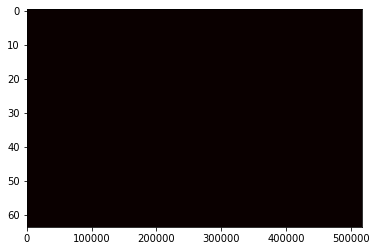

Cuda Spectrogram


In [5]:
plt.imshow(cuda_spec, interpolation='None', aspect='auto', cmap='hot')
plt.show()
print("Cuda Spectrogram")

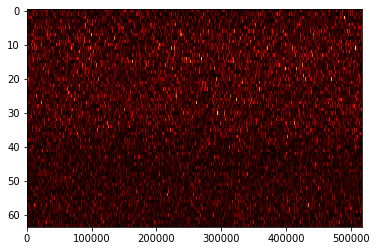

Raw Spectrogram


In [12]:
plt.imshow(raw_spec, interpolation='None', aspect='auto', cmap='hot')
plt.show()
print("Raw Spectrogram")

In [13]:
diff = raw_spec - cuda_spec
max_diff = np.amax(diff)
print("Max Diff: ", max_diff)
if not max_diff:
    print("Exact spectrograms! Rejoice!")
else:
    print("Dissimilar spectrograms! Uh oh - something went wrong!")
    plt.imshow(diff, interpolation='None', aspect='auto', cmap='hot')
    plt.show()

Max Diff:  0.0
Exact spectrograms! Rejoice!


In [3]:
filename = 'blc3_guppi_57386_VOYAGER1_0004.0000_block000_pol_power.dat'
f = open(filename, "r")
cuda_spec = np.fromfile(f, dtype=np.int32)
cuda_spec = np.reshape(cuda_spec, (64, -1, 2))
cuda_spec.shape



(64, 129152, 2)

29524
2178.489033875782


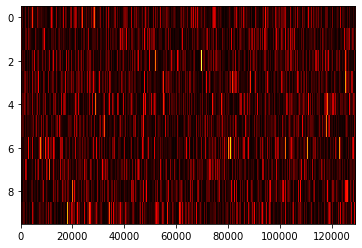

Cuda Spectrogram


In [9]:
pol_diff = np.abs(cuda_spec[:,:,0] - cuda_spec[:,:,1])
print(np.max(pol_diff))
print(np.mean(pol_diff))
plt.imshow(pol_diff[15:25,:], interpolation='None', aspect='auto', cmap='hot')

plt.show()
print("Cuda Spectrogram")

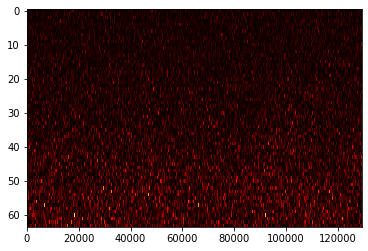

Cuda Spectrogram


In [6]:
plt.imshow(cuda_spec[:,:,1], interpolation='None', aspect='auto', cmap='hot')

plt.show()
print("Cuda Spectrogram")

In [20]:
pol_chan = []

for chan in range(len(pol_diff[:,0])):
    sum = np.max(pol_diff[chan])
    pol_chan.append(sum)

print(pol_chan)

[22033, 21941, 22021, 23856, 23472, 25957, 22616, 25363, 24328, 24645, 21843, 21800, 23987, 23167, 23923, 23472, 21309, 22827, 21540, 25302, 22744, 24694, 24648, 25409, 23799, 27225, 24648, 24210, 25007, 25098, 25107, 26320, 24310, 26200, 25571, 26245, 24957, 24008, 23718, 25783, 24444, 25955, 24033, 26456, 26196, 25880, 24512, 25828, 25843, 25441, 24693, 25824, 26265, 23930, 24473, 29524, 24760, 24087, 24560, 23970, 20843, 24833, 29400, 23845]


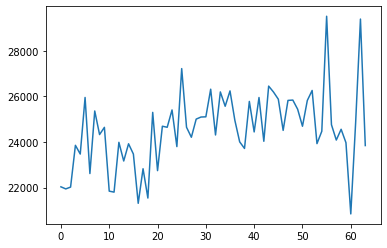

In [21]:
plt.plot(pol_chan)
plt.show()